In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [5]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [6]:
def missing_func(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  df_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
  return df_missing 

In [7]:
train_missing = missing_func(train)
test_missing = missing_func(test)

In [8]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


max : 1.000000
min : 0.000000
Skewness: 1.570970
Kurtosis: 1.087887


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


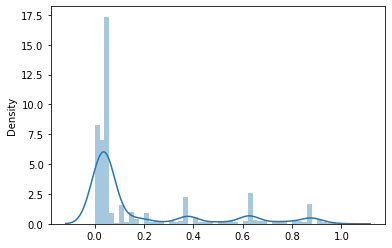

In [9]:
sns.distplot(train[target])

print("max : %f" %train[target].max())
print("min : %f" %train[target].min())
print('Skewness: %f' %train[target].skew())  #歪度
print('Kurtosis: %f' %train[target].kurt())  #尖度

In [10]:
train_missing_50 = train_missing[train_missing.percent<0.5].index
test_missing_50 =  test_missing[test_missing.percent<0.5].index

categorical_features = train.dtypes[train.dtypes=="object"].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [11]:
display(train[features])

,MIN_IF_2005,MAX_IR550_2003,MAX_BWDRVI_2006,MAX_Ferrous_Silicates_2015,MAX_PSSRc2,MIN_SWIR1_2001,MED_Gossan_2014,MIN_DSWI_5_2017,MED_MCARI2_2003,MAX_GLI_2019,...,MAX_TIRS2_2014,MAX_Chlgreen_2020,MED_AVI_2014,MED_Datt1,MED_SWIR2_2005,SAVI,MIN_B06,MAX_CTVI_2016,MAX_Cigreen_2001,MED_GEMI_2018
0,2.287744,0.041174,-0.807790,0.247929,0.485420,0.407793,0.073317,-1.630657,0.962313,0.065765,...,8.316806,5.321387,-21.318687,2.174363,0.220672,-0.676338,11.648505,0.484770,-0.796401,-96.560113
1,7.766109,NaN,-0.898490,0.268718,4.649447,0.719816,0.028102,-1.364369,NaN,0.062676,...,8.433764,6.333628,-50.719625,1.770014,0.211509,0.238271,595.152222,0.635513,-0.716131,-293.770035
2,2.942972,0.032602,-0.938031,0.274035,1.402710,0.836796,0.038018,-2.119730,0.533509,0.037107,...,8.172251,8.731324,-28.743195,1.423607,1.059149,-0.596540,1143.872803,0.642171,-0.665972,-363.528342
3,NaN,NaN,NaN,0.250801,0.813691,0.638487,0.048208,-2.253503,NaN,0.043197,...,8.427013,8.109914,-24.544638,1.228578,NaN,NaN,303.789825,0.323518,-0.776426,-256.282593
4,NaN,NaN,-0.972951,0.216011,0.495728,0.264401,0.039440,-2.958939,NaN,-0.019972,...,8.418266,8.786517,-20.495628,1.445115,NaN,-0.548395,154.763901,0.642958,-0.821655,-154.700459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,2.283688,0.037748,-0.938943,0.278072,0.905315,1.717434,0.126068,-1.652046,0.793869,-0.005504,...,8.390490,3.289918,-14.060425,0.544650,0.692350,-0.113897,88.595139,0.577206,-0.468670,-36.925848
14136,NaN,NaN,-0.916181,0.324296,0.700796,3.292267,0.042255,-2.488917,NaN,0.110217,...,8.458339,12.658616,-30.981390,0.775530,NaN,-0.800735,169.214569,0.649685,-0.561213,-367.716166
14137,2.854025,NaN,-0.973770,0.255705,0.348505,NaN,0.069842,-2.017714,NaN,0.020918,...,8.328788,7.220745,-25.319176,1.484879,0.735727,NaN,1.452019,0.583550,NaN,-143.453482
14138,NaN,NaN,-0.966676,0.180184,0.919555,0.983068,0.065974,-1.409552,NaN,0.087048,...,8.605825,4.588730,-71.847143,0.934216,NaN,NaN,342.214142,0.580790,-0.713751,-1019.846249


In [12]:
tr_mesh = train.mesh20.value_counts().index
te_mesh = test.mesh20.value_counts().index

test_only_mesh = list(set(te_mesh)-set(tr_mesh))
test_mesh = list(set(te_mesh)-set(test_only_mesh))

In [13]:
for col in test_mesh:
  print(f"{col} : {train.loc[train.mesh20==col].shape[0]}")

3725_10 : 187
3927_03 : 151
4027_03 : 117
3624_31 : 30
3623_03 : 6
3926_22 : 34
3624_10 : 1267
3624_20 : 1483
3926_13 : 57
3927_02 : 211
3725_01 : 475
3927_23 : 409


In [14]:
def get_mesh_values(df):
  _df = df["mesh20"].str.split('_').apply(pd.Series).astype(float)
  _df.columns = ["mesh20_left","mesh20_right"]
  df["mesh20_left"] = _df["mesh20_left"].astype(int)
  df["mesh20_right"] = _df["mesh20_right"].astype(int)
  return df

In [15]:
train = get_mesh_values(train)
test = get_mesh_values(test)

In [16]:
tr_mesh_l = train.mesh20_left.value_counts().index
te_mesh_l = test.mesh20_left.value_counts().index

tr_mesh_r = train.mesh20_right.value_counts().index
te_mesh_r = test.mesh20_right.value_counts().index

print(set(te_mesh_l)-set(tr_mesh_l))
print(set(te_mesh_r)-set(tr_mesh_r))

set()
set()


In [17]:
train.mesh20_left.value_counts()

3624    3334
3725    2395
3927    2290
4027    2214
3623    1762
3928     997
4028     529
3926     239
3831     184
3724     128
3622      68
Name: mesh20_left, dtype: int64

In [18]:
train.mesh20_right.value_counts()

13    2863
20    1917
23    1749
10    1518
30    1328
11     972
0      916
1      749
12     445
22     380
2      352
3      274
33     264
31     174
21     172
32      67
Name: mesh20_right, dtype: int64

In [19]:
train.groupby("mesh20")["cover"].agg(["mean","median","std"])

,mean,median,std
mesh20,,,
3622_23,0.058088,0.0500,0.023831
3623_02,0.143615,0.0500,0.179109
3623_03,0.403600,0.4500,0.142856
3623_12,0.087839,0.0500,0.119308
3623_13,0.308596,0.0500,0.330129
3623_20,0.077907,0.0500,0.052670
3623_22,0.084360,0.0500,0.111714
3623_23,0.107920,0.0500,0.154718
3624_10,0.159634,0.0500,0.213412


In [20]:
train.groupby("mesh20_left")["cover"].agg(["mean","median","std"])

,mean,median,std
mesh20_left,,,
3622,0.058088,0.050,0.023831
3623,0.216160,0.050,0.282756
3624,0.163614,0.050,0.241885
3724,0.073438,0.050,0.064581
3725,0.104660,0.050,0.184786
3831,0.050000,0.050,0.000000
3926,0.091464,0.050,0.160453
3927,0.117052,0.025,0.185027
3928,0.121464,0.025,0.220488


In [21]:
train.groupby("mesh20_right")["cover"].agg(["mean","median","std"])

,mean,median,std
mesh20_right,,,
0,0.168886,0.050,0.284496
1,0.053753,0.050,0.055708
2,0.052108,0.025,0.062684
3,0.117871,0.050,0.185702
10,0.141309,0.050,0.199288
11,0.059516,0.050,0.037002
12,0.058221,0.050,0.088873
13,0.364450,0.325,0.332762
20,0.156364,0.050,0.250516


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

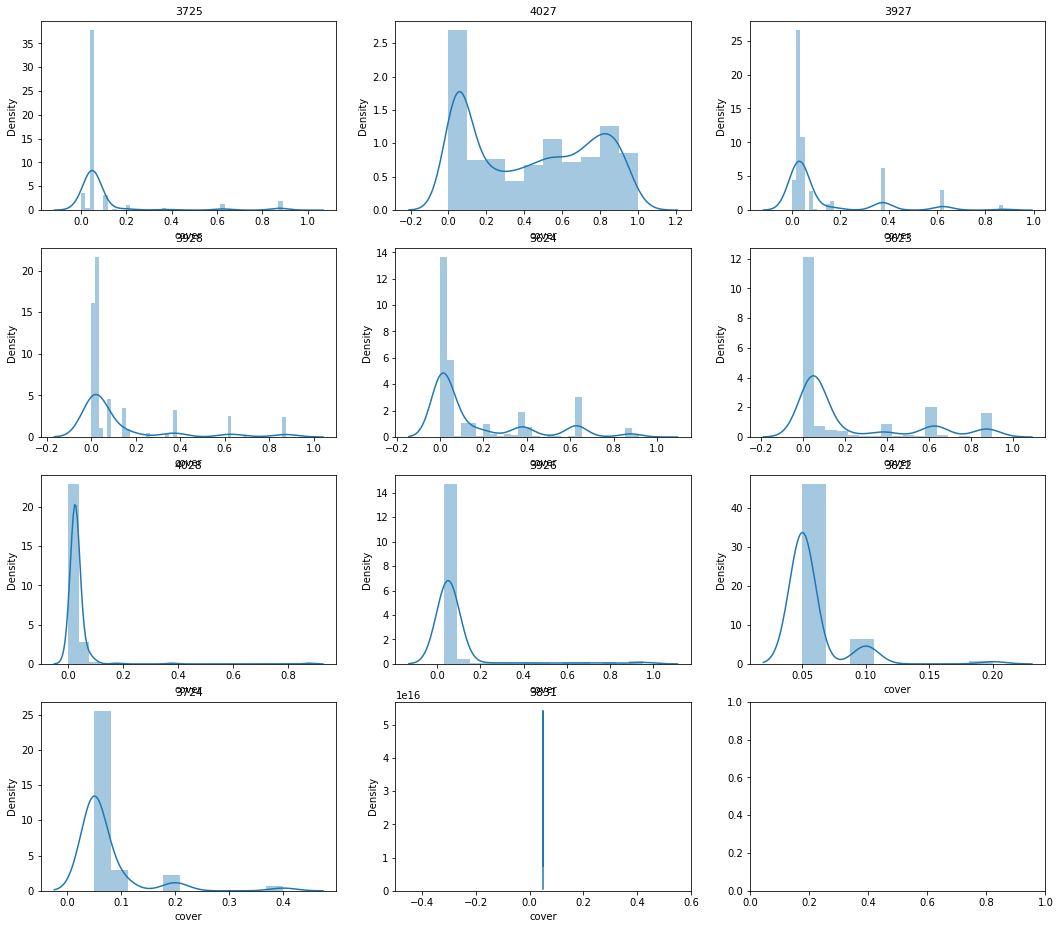

In [22]:
nr_rows = int(len(train.mesh20_left.unique()) / 3) + 1
nr_cols = 3

mesh20_left_list = list(train.mesh20_left.unique())

fig,axs = plt.subplots(nr_rows,nr_cols,figsize=(nr_cols*6,nr_rows*4))

for r in range(0,nr_rows):
  for c in range(0,nr_cols):
    i = r*nr_cols+c
    if i < len(mesh20_left_list):
      col = mesh20_left_list[i]
      sns.distplot(train.loc[train.mesh20_left==col]["cover"], ax=axs[r][c])
      str_title = col
      axs[r][c].set_title(str_title,fontsize=11)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

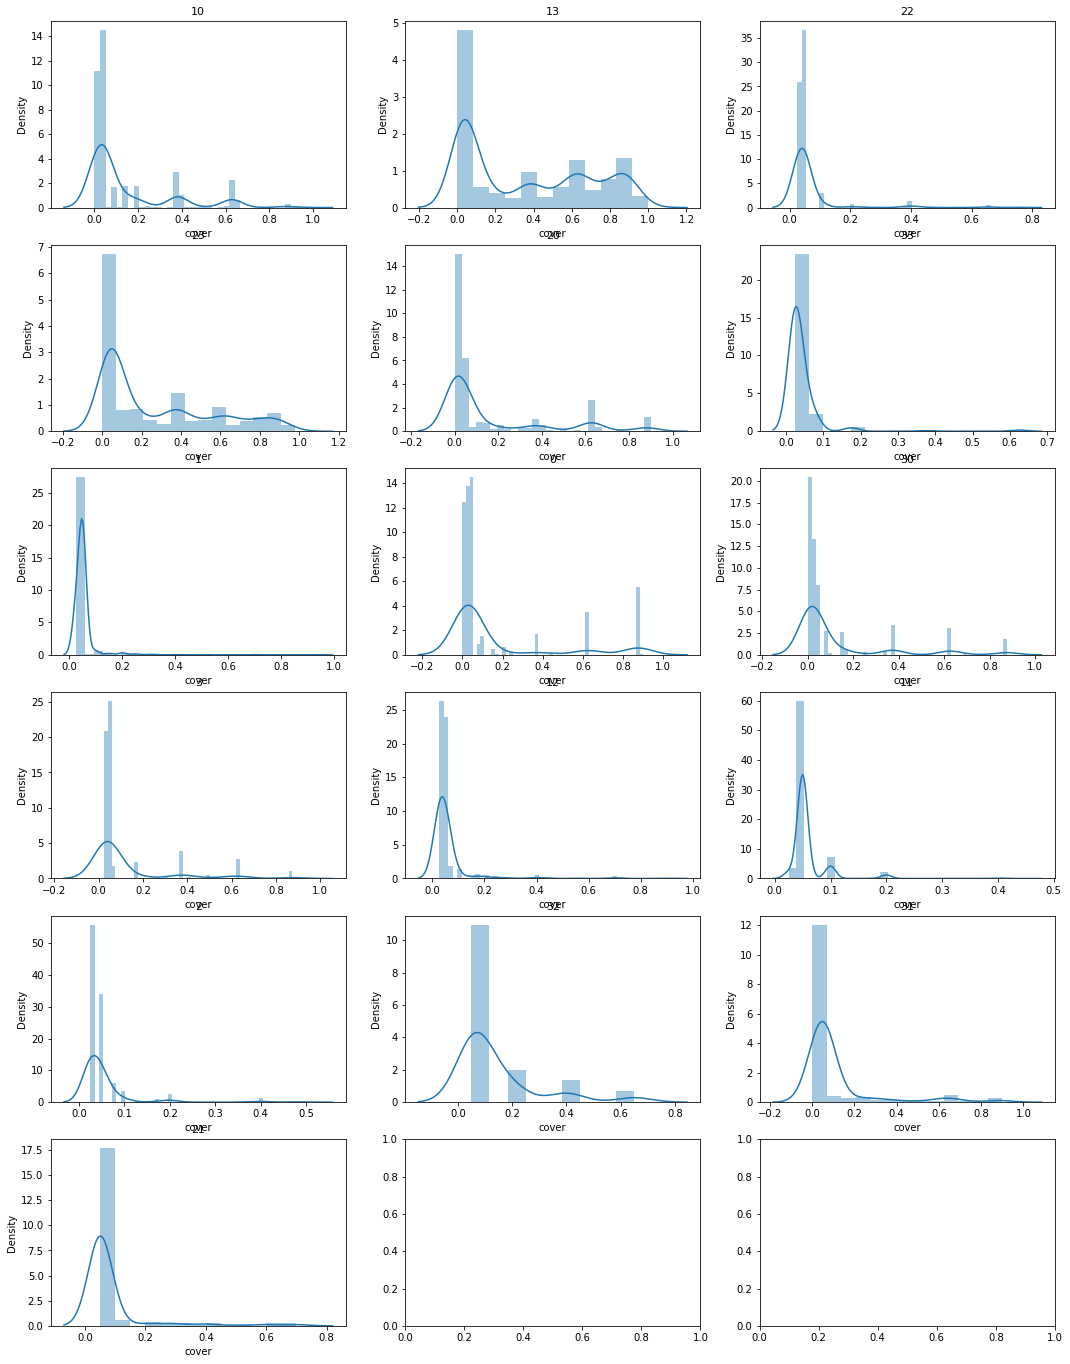

In [23]:
nr_rows = int(len(train.mesh20_right.unique()) / 3) + 1
nr_cols = 3

mesh20_right_list = list(train.mesh20_right.unique())

fig,axs = plt.subplots(nr_rows,nr_cols,figsize=(nr_cols*6,nr_rows*4))

for r in range(0,nr_rows):
  for c in range(0,nr_cols):
    i = r*nr_cols+c
    if i < len(mesh20_right_list):
      col = mesh20_right_list[i]
      sns.distplot(train.loc[train.mesh20_right==col]["cover"], ax=axs[r][c])
      str_title = col
      axs[r][c].set_title(str_title,fontsize=11)

## Model

In [24]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error

In [26]:
class CFG:
  ver=3
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols="cover"
  boosting_type="gbdt"
  fold_target=["bins","mesh20_left","mesh20_right"]

In [27]:
# =========================================================================================
# CV split
# =========================================================================================
target_bins = [-1, .3, .5, .7, 1]
target_bin_name = ['0-0.3', '0.3-0.5', '0.5-0.7', '0.7-']
train["target_bins"] = pd.cut(train[target].cover, bins=target_bins, labels=target_bin_name)
bins_map = {'0-0.3':0, '0.3-0.5':1, '0.5-0.7':2, '0.7-':3}
train["bins"] = train["target_bins"].map(bins_map)

Fold = MultilabelStratifiedKFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
for n, (train_index, val_index) in enumerate(Fold.split(train, train[CFG.fold_target])):
    train.loc[val_index, 'fold'] = int(n)
train['fold'] = train['fold'].astype(int)
display(train.groupby('fold').size())

fold
0    3535
1    3535
2    3535
3    3535
dtype: int64

In [28]:
features = list(features)
features.remove('id')

In [29]:
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6,
        "n_estimators":1000
    }

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.109131
[400]	valid_0's rmse: 0.107398
[600]	valid_0's rmse: 0.107172
Early stopping, best iteration is:
[665]	valid_0's rmse: 0.107134
RMSE : 0.10713380192387592
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.113497
[400]	valid_0's rmse: 0.111321
[600]	valid_0's rmse: 0.110795
[800]	valid_0's rmse: 0.11056
Early stopping, best iteration is:
[796]	valid_0's rmse: 0.110559
RMSE : 0.11055949700356077
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.107673
[400]	valid_0's rmse: 0.105732
[600]	valid_0's rmse: 0.105242
[800]	valid_0's rmse: 0.105144
Early stopping, best iteration is:
[809]	valid_0's rmse: 0.105138
RMSE : 0.1051378633180527
===============  FOLD : 3  ===============
Training until validatio

,feature,importance
1053,sst_ymd,0.004402
2855,VARIgreen,0.004281
1880,month,0.004237
3069,sst_diff,0.003381
1239,MAX_CI,0.002887
889,Gossan,0.002602
904,TIRS2,0.002580
1950,GLI,0.002580
3142,Blue,0.002514
47,NBR2,0.002481


CV Score: 0.10782142644704515


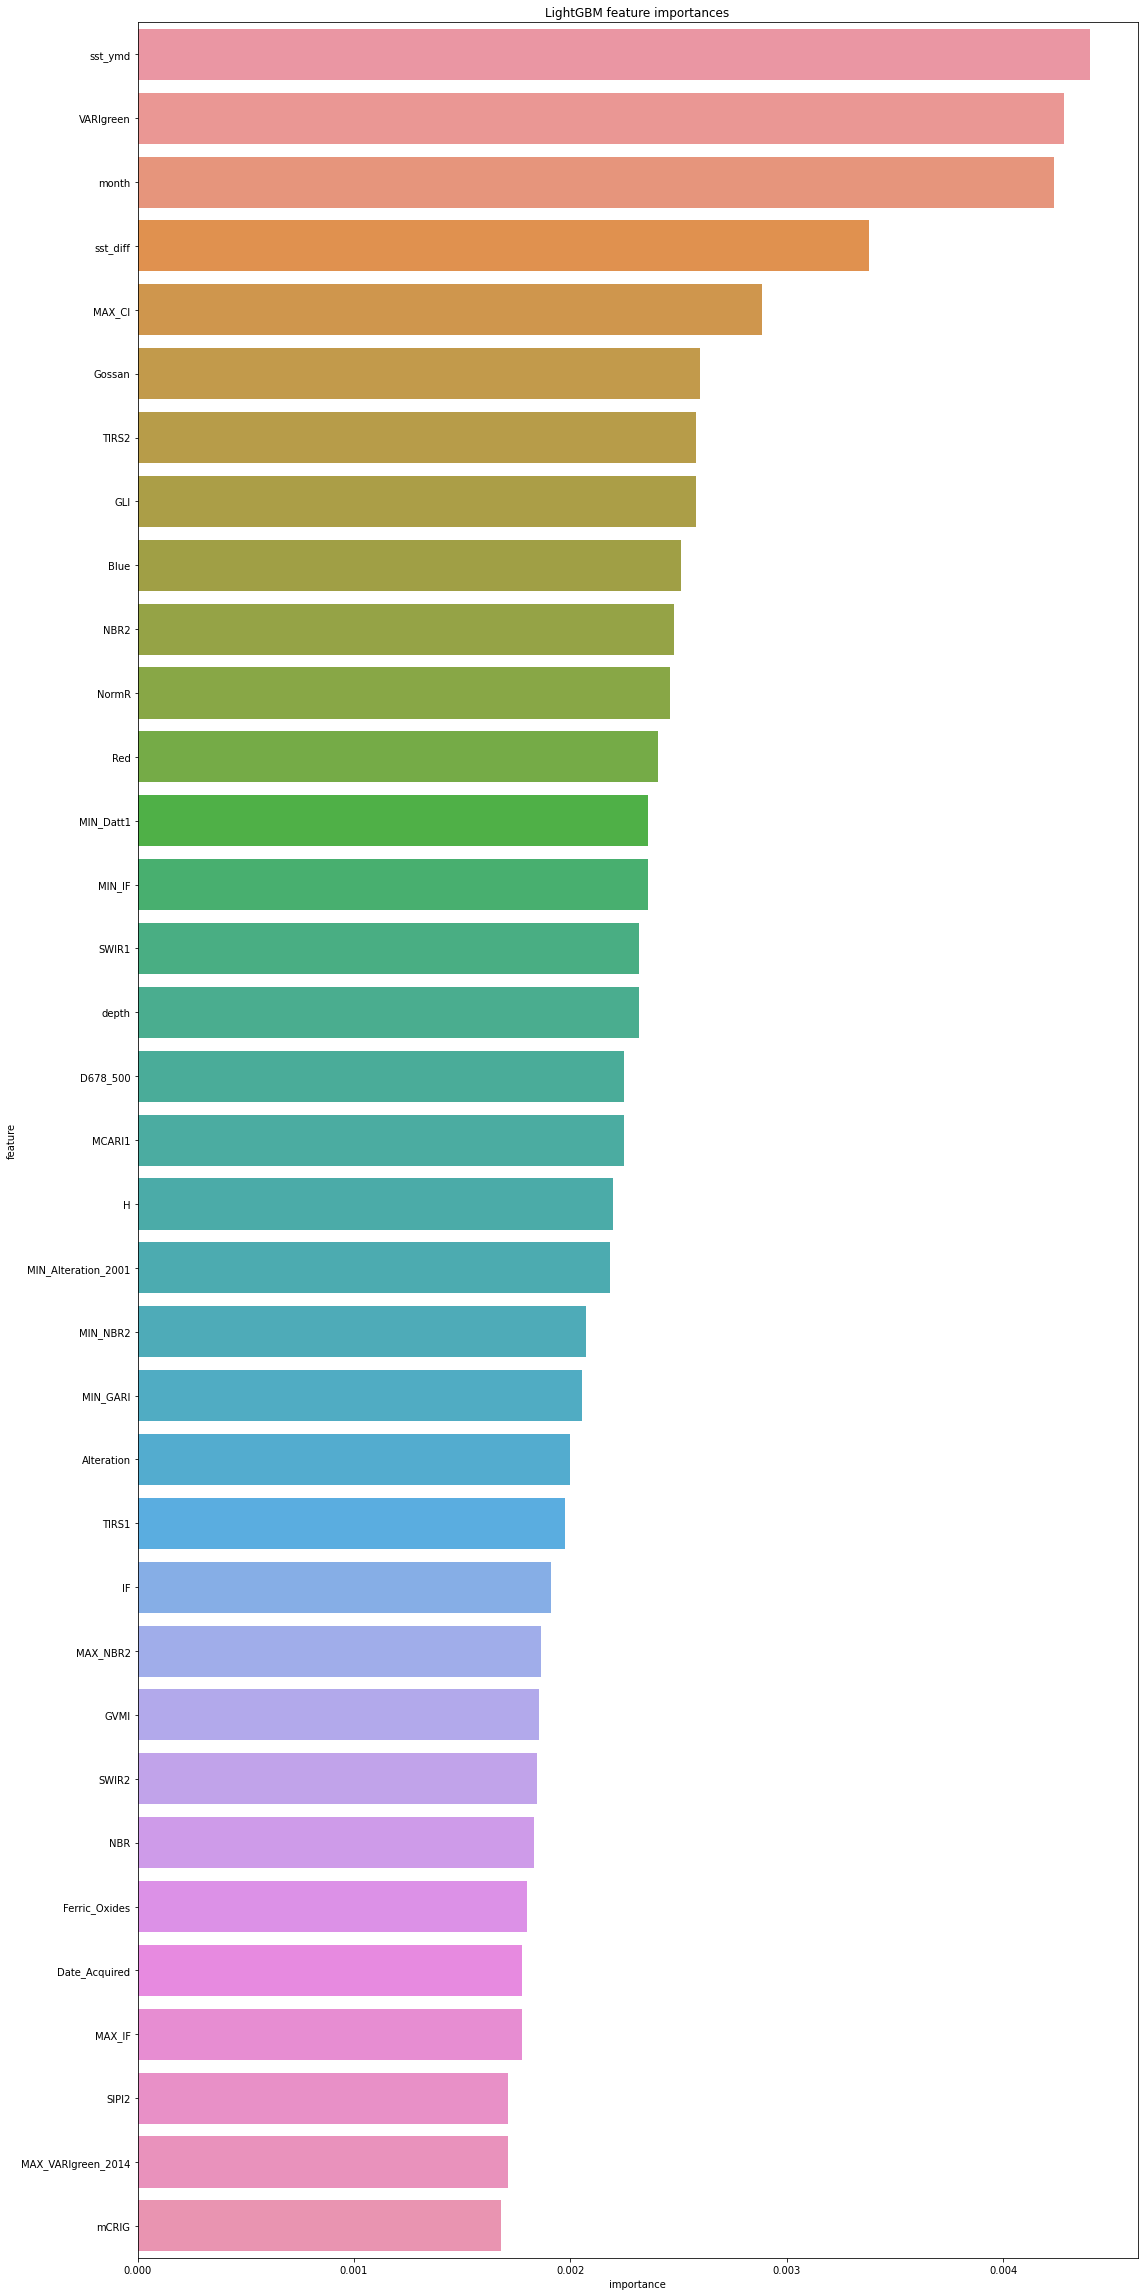

In [30]:
oof_df = pd.DataFrame()
df_importance = pd.DataFrame({'feature': features})
df_importance['importance'] = 0

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[features].values
    valid_X = valid_folds[features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    oof_df = pd.concat([oof_df, valid_folds])

    f_importance = np.array(model.feature_importances_)
    temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
    df_importance['importance'] += temp_importance['importance']

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
df_importance = df_importance.sort_values('importance', ascending=False)
best_features35 = df_importance.iloc[:35].feature.tolist()
best_features50 = df_importance.iloc[:50].feature.tolist()
display(df_importance.head(35))
fig = plt.figure(figsize=(16, 32), tight_layout=True)
sns.barplot(x="importance", y="feature", data=df_importance.head(35))
plt.title("LightGBM feature importances")
score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')

In [31]:
tmp_features = df_importance.loc[df_importance.importance>0].feature.tolist()
weak_features = set(tmp_features) - set(best_features35)
weak_features = list(weak_features)

oof_weak_df = pd.DataFrame()

params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1,
        "n_estimators":1000
    }

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[weak_features].values
    valid_X = valid_folds[weak_features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["weak_pred"] = model.predict(valid_X)
    oof_weak_df = pd.concat([oof_weak_df, valid_folds])

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["weak_pred"]))
    print(f"RMSE : {score}")

train = train.merge(oof_weak_df[["id","weak_pred"]],how="left",on="id")
score = np.sqrt(mean_squared_error(oof_weak_df[CFG.target_cols], oof_weak_df["weak_pred"]))
print(f'CV Score: {score}')

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.111238
[400]	valid_0's rmse: 0.10957
Early stopping, best iteration is:
[478]	valid_0's rmse: 0.109201
RMSE : 0.10920098258214114
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.114429
[400]	valid_0's rmse: 0.112674
[600]	valid_0's rmse: 0.112054
[800]	valid_0's rmse: 0.111884
Early stopping, best iteration is:
[886]	valid_0's rmse: 0.11179
RMSE : 0.11179014479074773
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.109866
[400]	valid_0's rmse: 0.108797
Early stopping, best iteration is:
[547]	valid_0's rmse: 0.108512
RMSE : 0.10851201057337251
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.112023
[400]	valid_0's rmse: 0.

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[37]	valid_0's rmse: 0.110601
RMSE : 0.11060060207210652
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[30]	valid_0's rmse: 0.113095
RMSE : 0.11309536113165489
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[31]	valid_0's rmse: 0.110393
RMSE : 0.110393284967883
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[33]	valid_0's rmse: 0.110552
RMSE : 0.11055171636046807
CV Score: 0.11116588195626559


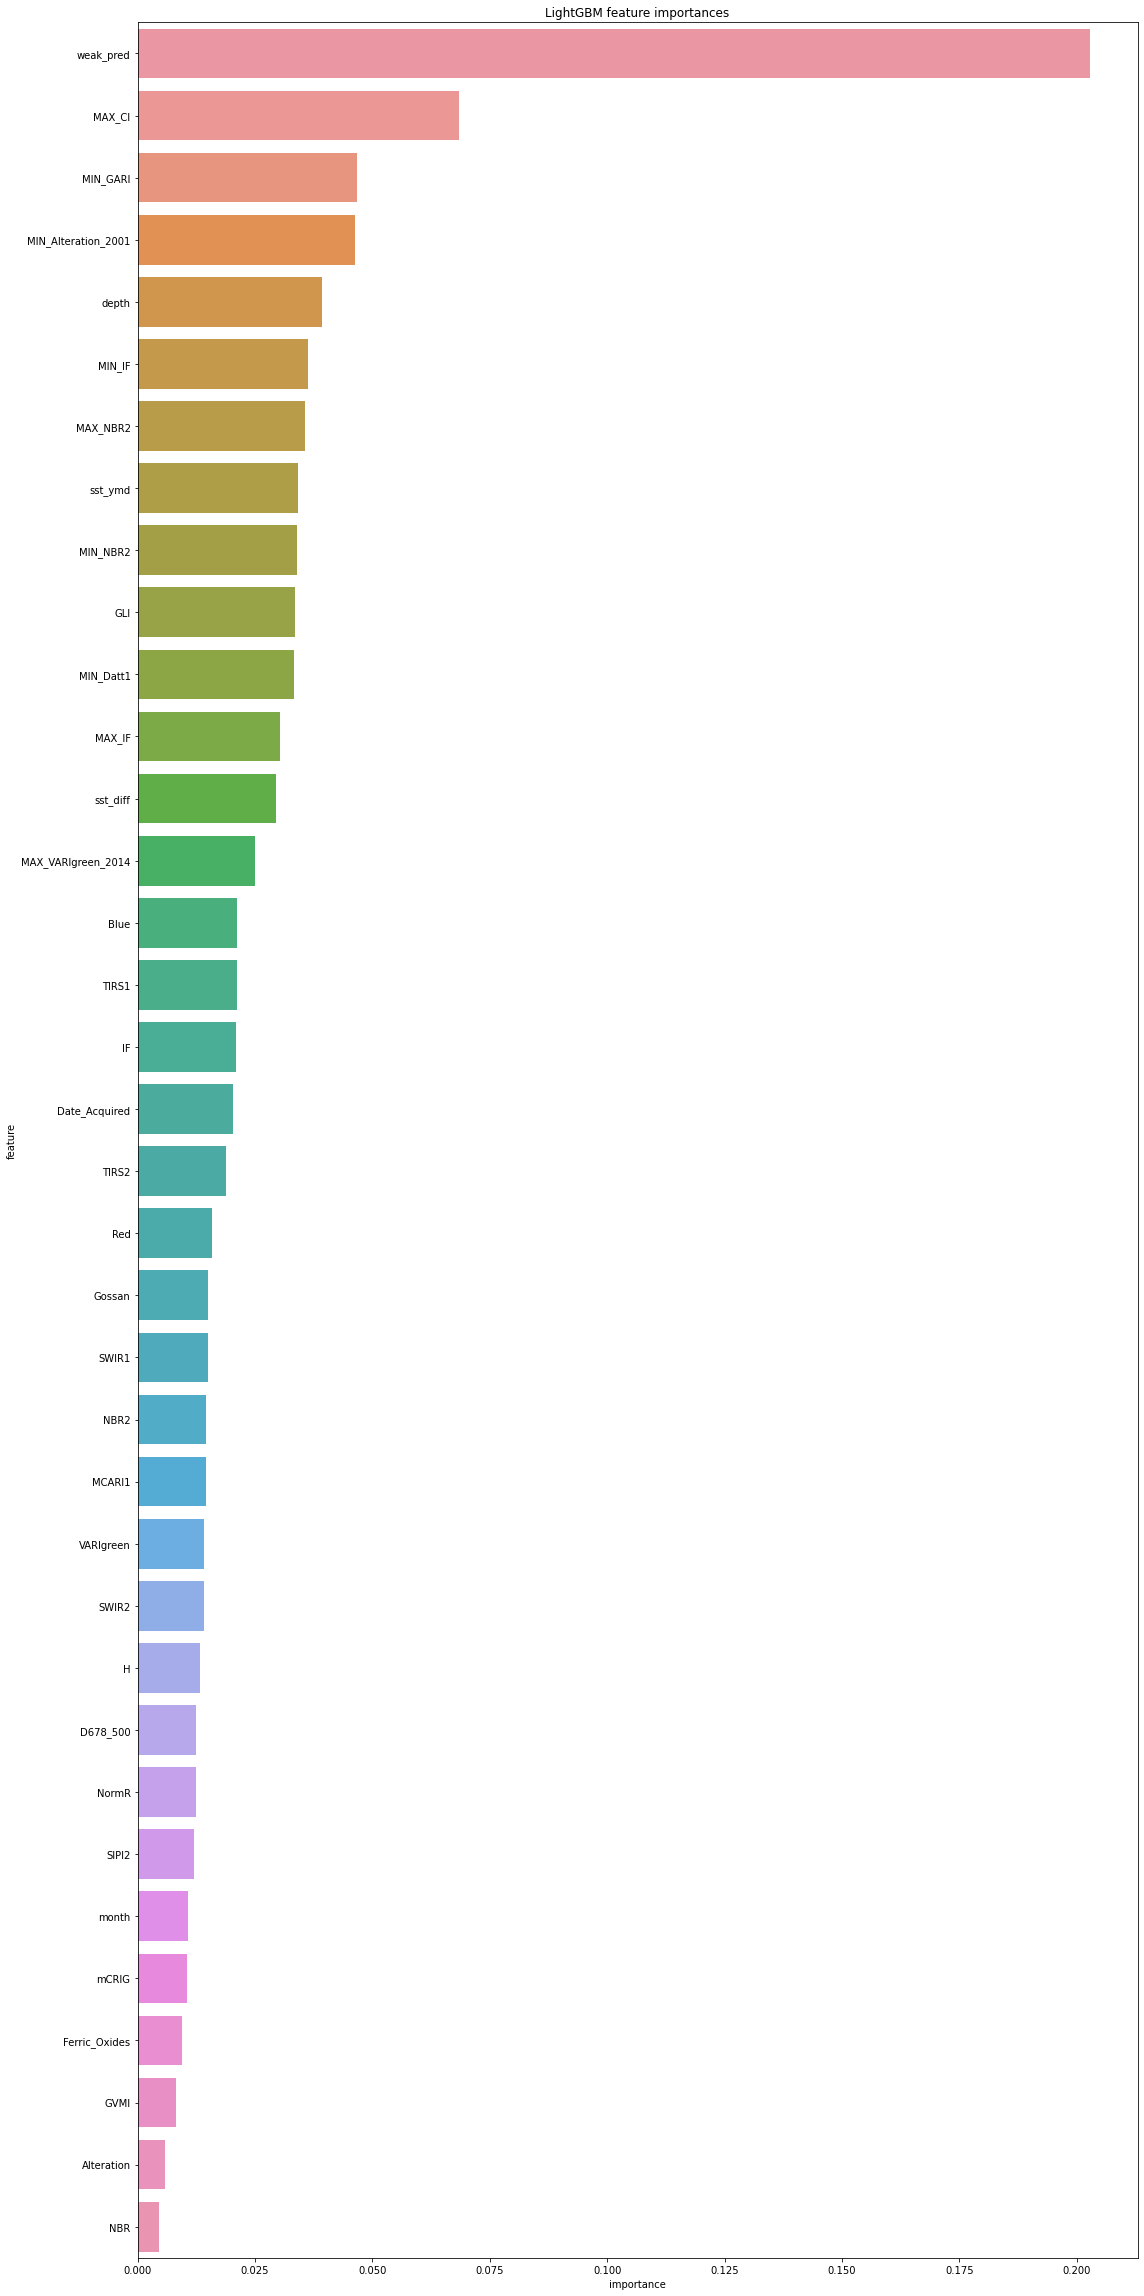

In [32]:
new_features = best_features35 + ["weak_pred"]
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1,
        "n_estimators":1000
    }

oof_df = pd.DataFrame()
df_importance = pd.DataFrame({'feature': new_features})
df_importance['importance'] = 0

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[new_features].values
    valid_X = valid_folds[new_features].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    oof_df = pd.concat([oof_df, valid_folds])

    f_importance = np.array(model.feature_importances_)
    temp_importance = pd.DataFrame({'feature': new_features, 'importance': f_importance})
    df_importance['importance'] += temp_importance['importance']

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
df_importance = df_importance.sort_values('importance', ascending=False)
fig = plt.figure(figsize=(16, 32), tight_layout=True)
sns.barplot(x="importance", y="feature", data=df_importance.head(50))
plt.title("LightGBM feature importances")
score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')

In [33]:
params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.1,
        "n_estimators":1000
    }

oof_df = pd.DataFrame()
test_preds = np.zeros((len(test), CFG.n_folds))

for fold in range(CFG.n_folds):
  if fold in CFG.trn_fold:
    print("="*15,f" FOLD : {fold} ","="*15)
    train_folds = train[train['fold'] != fold].reset_index(drop=True)
    valid_folds = train[train['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_cols].values

    train_X = train_folds[best_features50].values
    valid_X = valid_folds[best_features50].values
    test_X = test[best_features50].values
    train_labels = train_folds[CFG.target_cols].values
    valid_labels = valid_folds[CFG.target_cols].values

    model = lgb.LGBMRegressor(**params)
    model.fit(train_X, train_labels,
            eval_set=[(valid_X, valid_labels)],
            eval_metric="rmse",
            verbose = 200,
            early_stopping_rounds=50)
    
    valid_folds["pred"] = model.predict(valid_X)
    test_preds[:, fold] = model.predict(test_X)
    oof_df = pd.concat([oof_df, valid_folds])

    score = np.sqrt(mean_squared_error(valid_labels, valid_folds["pred"]))
    print(f"RMSE : {score}")

score = np.sqrt(mean_squared_error(oof_df[CFG.target_cols], oof_df["pred"]))
print(f'CV Score: {score}')
pd.DataFrame(np.mean(test_preds, axis=1)).to_csv(os.path.join(OUTPUT_DIR, f'submit_{CFG.model}_seed{CFG.seed}_ver{CFG.ver}.csv'), header=False)

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.130803
[400]	valid_0's rmse: 0.126949
[600]	valid_0's rmse: 0.125762
[800]	valid_0's rmse: 0.125411
[1000]	valid_0's rmse: 0.12527
Did not meet early stopping. Best iteration is:
[957]	valid_0's rmse: 0.125218
RMSE : 0.12521847373503753
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.131996
[400]	valid_0's rmse: 0.128224
[600]	valid_0's rmse: 0.126542
[800]	valid_0's rmse: 0.12598
[1000]	valid_0's rmse: 0.125678
Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.125669
RMSE : 0.1256689857900031
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's rmse: 0.131993
[400]	valid_0's rmse: 0.128169
[600]	valid_0's rmse: 0.126937
[800]	valid_0's rmse: 0.126502
[1000]	valid_0's rmse: 0.12642
Did not m

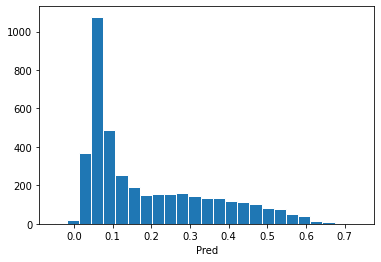

In [34]:
plt.hist(np.mean(test_preds, axis=1),bins=25,edgecolor='white')
plt.xlabel("Pred")
plt.show()

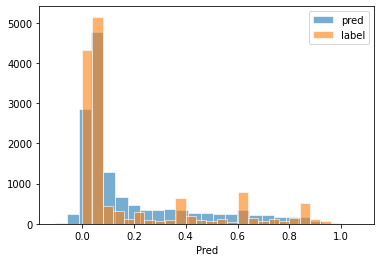

In [37]:
plt.hist(oof_df.pred, label='pred', bins=25, edgecolor='white', alpha=.6)
plt.hist(oof_df.cover, label="label", bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()